# Trend Data

##### Extraction: Through the smartsensorclient API

### Content: 

Plants (11): 
   - Assets (55): all are motors  
        - Measurements: 
            - Name / ID / Value / measurementCreated (date - time)
            - Max ID n°: 222
            - 'Only' 37 differents measurements in the data available

Issue: Extraction is very long. If we get more data, we need to find another way to extract it

Question for ABB: How to pull the data efficiently?



# Data Preprocessing

I take the 'assetID' and the 'datetime' variable as key: 
 - 1.2M datapoints
 - 3 groups of variables:
     - 2 groups have common assets and datatimes but do not share it between them (~660k and ~600K)
     - 3rd group: available only for a subset of the first group (~325k). Probably depending on the sensor!
     - 4 variables outside those with less observations

Question for ABB: 
- How the trigger of the sensor works?
- How are the 2 groups of variables related?


# Variable presentation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Preprocessing import get_measurement_info, authenticate
from Exploration import explore_dataset
DEFAULT_SETTINGS_FILE = 'settings.yaml'
authenticate(settings_file=DEFAULT_SETTINGS_FILE)
client = authenticate(DEFAULT_SETTINGS_FILE)
data= pd.read_pickle('DataClean.pkl')
table = explore_dataset(data)
table1 = pd.DataFrame(table,  columns = ['Variable Name', 'N (# observations)', '# unique values'])
table = pd.DataFrame(table, index=table1.iloc[:, 0], columns = ['Variable Name', 'N (# observations)', '# unique values'])

Rotational speed of the shaft, measured in revolutions per minute (rpm)
Temperature in °C or °F, measured in the contact point where the sensor tag touches the mounting parts.
Vibration velocity, rms-value in mm/s or in/s, always showing whichever is the highest value of the three directions: Radial, Tangential, Axial.
The number of hours since the commissioning of the sensor during which the motor has been in operation and not standing still.
The number of times in the measurement period, that motor has gone from standstill to operation.
Frequency of the AC-voltage from the electric supply network, measured in Hz.
The bearing condition is calculated for each measurement. A condition below 5 means that the measurement did not reveal signs of damage. A condition between 5 and 10 means that signs of a developing damage were detected. A condition higher   than 10 means that significant damage was detected . The bearing condition is based on such factors as the vibration spectrum. It has a

Misalignment (ID: 88):  N=223040   Unique Values=6
[  0.  20.  40.  60.  80. 100.]

Speed Reference Direction (ID: 91):  N=336303   Unique Values=2
[0. 1.]

RMS Speed Closeness (ID: 93):  N=325746   Unique Values=1
[0.]

RMS Speed Quality (ID: 94):  N=325746   Unique Values=4
[0. 1. 2. 3.]

Operating Load (ID: 208):  N=165243   Unique Values=4120

Motor Running Time (ID: 209):  N=108532   Unique Values=5
[  0.  15.  30.  60. 120.]

Motor On/Off (ID: 222):  N=95747   Unique Values=1104

Regreasing Advice (ID: 65):  N=2476   Unique Values=2476



In [3]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)
pd.set_option('max_colwidth', 200)

In [4]:
from Preprocessing import get_measurement_info, authenticate
infos = get_measurement_info('measurementTypeDescription', data, client)
infos



Rotational speed of the shaft, measured in revolutions per minute (rpm)
Temperature in °C or °F, measured in the contact point where the sensor tag touches the mounting parts.
Vibration velocity, rms-value in mm/s or in/s, always showing whichever is the highest value of the three directions: Radial, Tangential, Axial.
The number of hours since the commissioning of the sensor during which the motor has been in operation and not standing still.
The number of times in the measurement period, that motor has gone from standstill to operation.
Frequency of the AC-voltage from the electric supply network, measured in Hz.
The bearing condition is calculated for each measurement. A condition below 5 means that the measurement did not reveal signs of damage. A condition between 5 and 10 means that signs of a developing damage were detected. A condition higher   than 10 means that significant damage was detected . The bearing condition is based on such factors as the vibration spectrum. It has a

[[2.0,
  'Rotational speed of the shaft, measured in revolutions per minute (rpm)'],
 [4.0,
  'Temperature in °C or °F, measured in the contact point where the sensor tag touches the mounting parts.'],
 [8.0,
  'Vibration velocity, rms-value in mm/s or in/s, always showing whichever is the highest value of the three directions: Radial, Tangential, Axial.'],
 [9.0,
  'The number of hours since the commissioning of the sensor during which the motor has been in operation and not standing still.'],
 [10.0,
  'The number of times in the measurement period, that motor has gone from standstill to operation.'],
 [15.0,
  'Frequency of the AC-voltage from the electric supply network, measured in Hz.'],
 [27.0,
  'The bearing condition is calculated for each measurement. A condition below 5 means that the measurement did not reveal signs of damage. A condition between 5 and 10 means that signs of a developing damage were detected. A condition higher   than 10 means that significant damage was de

In [7]:
table.iloc[:13, 1:]

N (# observations)  \
Variable Name                                                     
Speed (ID: 2)                                            656771   
Skin Temperature (ID: 4)                                 660571   
Overall Vibration (ID: 8)                                660626   
Operating Time (ID: 9)                                   593120   
Number of Starts (ID: 10)                                593120   
Motor Supply Frequency (ID: 15)                          656774   
Bearing Condition (ID: 27)                               660626   
Vibration (Radial) (ID: 31)                              662147   
Vibration (Tangential) (ID: 32)                          662147   
Vibration (Axial) (ID: 33)                               662147   
Output Power (ID: 64)                                    656564   
Simple Misalignment (ID: 66)                             260465   
Nr. Of Starts Between Measurements (ID: 67)              364944   

                                             # unique values  
Variable Name                                                 
Speed (ID: 2)                                         160982  
Skin Temperature (ID: 4)                                4827  
Overall Vibration (ID: 8)                                536  
Operating Time (ID: 9)                                 12289  
Number of Starts (ID: 10)                               4436  
Motor Supply Frequency (ID: 15)                        70698  
Bearing Condition (ID: 27)                                30  
Vibration (Radial) (ID: 31)                              501  
Vibration (Tangential) (ID: 32)                          541  
Vibration (Axial) (ID: 33)                               174  
Output Power (ID: 64)                                   6249  
Simple Misalignment (ID: 66)                               2  
Nr. Of Starts Between Measurements (ID: 67)                9

In [8]:
table.iloc[13:28, 1:]

N (# observations)  # unique values
Variable Name                                                 
KPI Harmonics X1 (ID: 71)              325765              256
KPI Harmonics X2 (ID: 72)              325765              256
KPI Harmonics X3 (ID: 73)              325766              256
KPI Harmonics X4 (ID: 74)              325766              256
KPI Harmonics X5 (ID: 75)              325766               40
KPI Harmonics Y1 (ID: 76)              325766              256
KPI Harmonics Y2 (ID: 77)              325766              256
KPI Harmonics Y3 (ID: 78)              325766              253
KPI Harmonics Y4 (ID: 79)              325724              256
KPI Harmonics Y5 (ID: 80)              325725                1
KPI Harmonics Z1 (ID: 81)              325726              256
KPI Harmonics Z2 (ID: 82)              325726              256
KPI Harmonics Z3 (ID: 83)              325719              255
KPI Harmonics Z4 (ID: 84)              325719              255
KPI Harmonics Z5 (ID: 85)              325719               23

In [9]:
table.iloc[28:, 1:]

N (# observations)  # unique values
Variable Name                                                          
Amplitude Fs (ID: 86)                           325719              831
Misalignment (ID: 88)                           223040                6
Speed Reference Direction (ID: 91)              336303                2
RMS Speed Closeness (ID: 93)                    325746                1
RMS Speed Quality (ID: 94)                      325746                4
Operating Load (ID: 208)                        165243             4120
Motor Running Time (ID: 209)                    108532                5
Motor On/Off (ID: 222)                           95747             1104
Regreasing Advice (ID: 65)                        2476             2476

# Variable description 

In [6]:
pd.DataFrame(infos, columns=['Measurement ID','Description'])

Measurement ID  \
0              2.0   
1              4.0   
2              8.0   
3              9.0   
4             10.0   
5             15.0   
6             27.0   
7             31.0   
8             32.0   
9             33.0   
10            64.0   
11            66.0   
12            67.0   
13            91.0   
14           208.0   
15           209.0   
16            65.0   

                                                                                                                                                                                                Description  
0                                                                                                                                   Rotational speed of the shaft, measured in revolutions per minute (rpm)  
1                                                                                                   Temperature in °C or °F, measured in the contact point where the sensor tag touches the mounting parts.  
2                                                          Vibration velocity, rms-value in mm/s or in/s, always showing whichever is the highest value of the three directions: Radial, Tangential, Axial.  
3                                                                            The number of hours since the commissioning of the sensor during which the motor has been in operation and not standing still.  
4                                                                                                          The number of times in the measurement period, that motor has gone from standstill to operation.  
5                                                                                                                             Frequency of the AC-voltage from the electric supply network, measured in Hz.  
6   The bearing condition is calculated for each measurement. A condition below 5 means that the measurement did not reveal signs of damage. A condition between 5 and 10 means that signs of a developi...  
7                                                                  Vibration velocity, rms-value in mm/s or in/s, measured in the direction that is perpendicular to the baseplate of the smart sensor tag.  
8   Vibration velocity, rms-value in mm/s or in/s, measured in the direction of the short edge of the smart sensor tag.\r\n\r\nNOTE: Either the long edge (preferred) or the short edge of the sensor MU...  
9   Vibration velocity mm/s rms, measured in the direction of the long edge of the smart sensor tag.\r\n\r\nNOTE: Either the long edge (preferred) or the short edge of the sensor MUST always be parall...  
10                                                                                                                                            Output power is the power measured at the shaft of the motor.  
11           Simple True/False indicator to show if the motor is subject to misalignment or not. There is no indication for how serious the misalignment is, nor by how much the motor is out of alignment.  
12                                                                                                                                                                                                     None  
13                                                                                                                                                                                                     None  
14                                                                                                                                                                                                     None  
15                                                                                                                                                                                                     None  
16                                    Remaining time until the motor needs to be greased, based on the or

# Bearing condition: Target variable

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

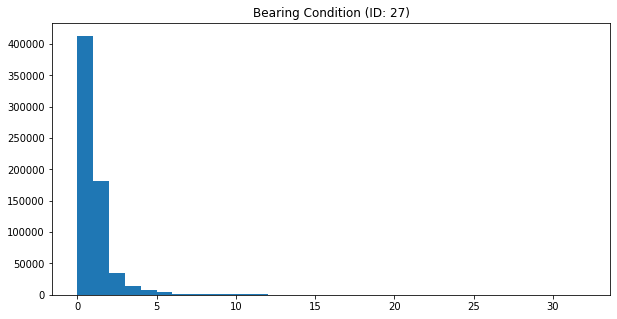

Obs >= 5 = 9676
Obs >= 10 = 2426


In [25]:
plt.hist(data.iloc[:, 8].dropna(), bins=32)
plt.title(data.columns[8])
plt.show()
print('Obs >= 5 = {}'.format(np.sum(data.iloc[:, 8].dropna()>=5)))
print('Obs >= 10 = {}'.format(np.sum(data.iloc[:, 8].dropna()>=10)))

The bearing condition is calculated for each measurement. A condition below 5 means that the measurement did not reveal signs of damage. A condition between 5 and 10 means that signs of a developing damage were detected. A condition higher   than 10 means that significant damage was detected . The bearing condition is based on such factors as the vibration spectrum. It has a highly transient behaviour and can change significantly from one measurement to the next. Vibration velocity, rms-value in mm/s or in/s, measured in the direction that is perpendicular to the baseplate of the smart sensor tag.

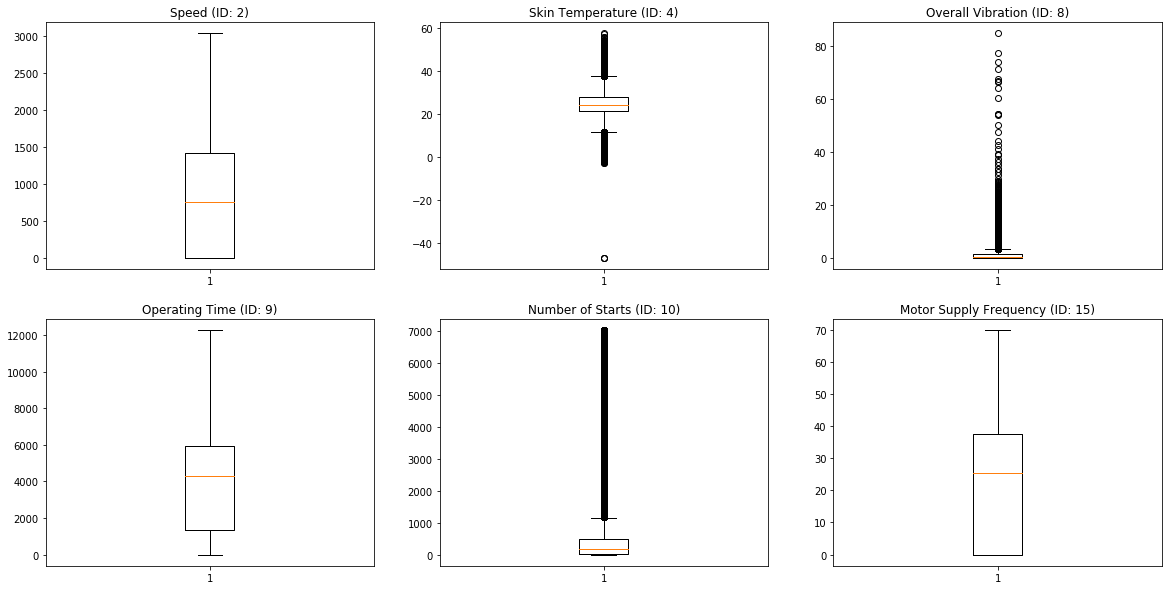

In [64]:
#import matplotlib.pyplot as plt
from misc import not_all_nans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
j=1
for i in range(2, 8):
    plt.subplot(2,3,j)
    plt.boxplot(data.iloc[:, i].dropna())
    plt.title(data.columns[i])
    j+=1
plt.show()



# Variable boxplots

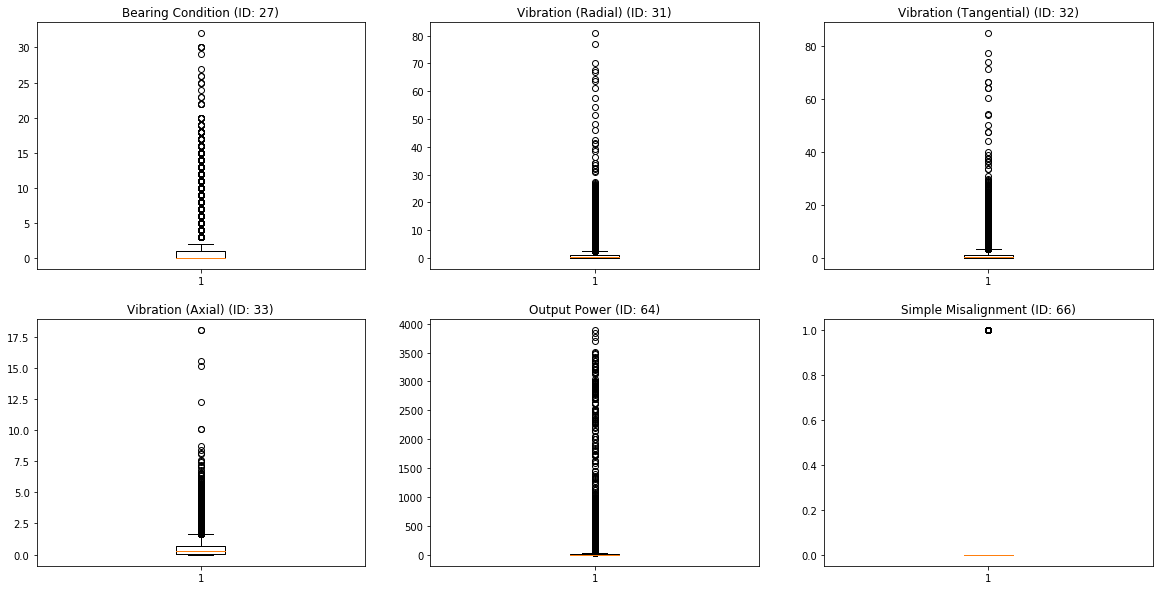

In [67]:
j=1
for i in range(8, 14):
    plt.subplot(2,3,j)
    plt.boxplot(data.iloc[:, i].dropna())
    plt.title(data.columns[i])
    j+=1
plt.show()

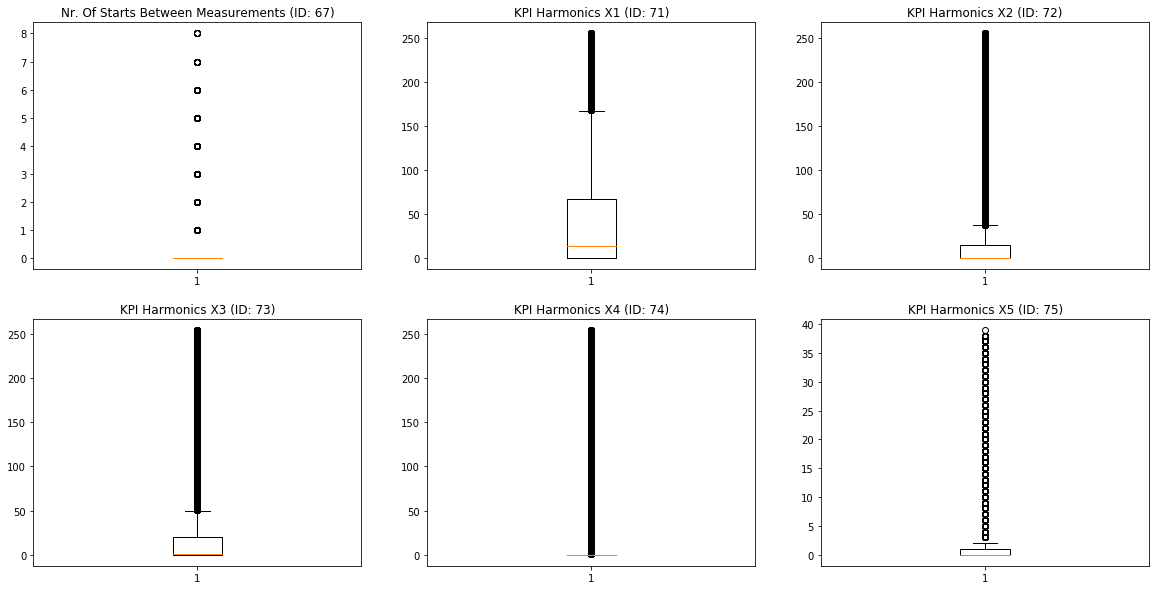

In [68]:
j=1
for i in range(14, 20):
    plt.subplot(2,3,j)
    plt.boxplot(data.iloc[:, i].dropna())
    plt.title(data.columns[i])
    j+=1
plt.show()

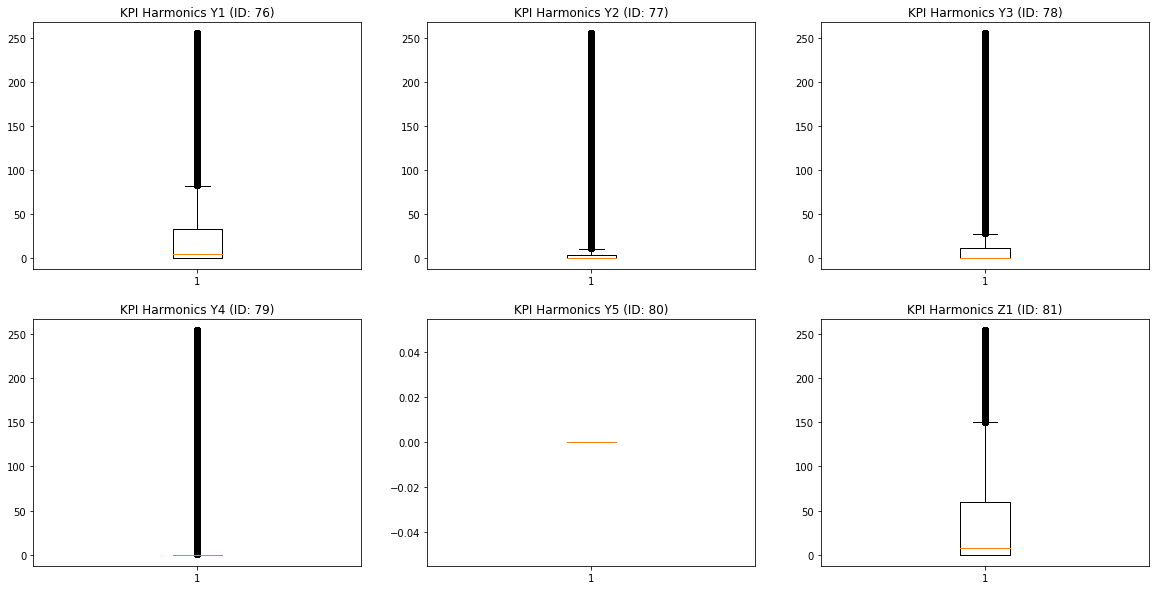

In [69]:
j=1
for i in range(20, 26):
    plt.subplot(2,3,j)
    plt.boxplot(data.iloc[:, i].dropna())
    plt.title(data.columns[i])
    j+=1
plt.show()

In [70]:
j=1
for i in range(30, 36):
    plt.subplot(2,3,j)
    plt.boxplot(data.iloc[:, i].dropna())
    plt.title(data.columns[i])
    j+=1
plt.show()

# Some plots for one asset

In [9]:
x=[0, 0]
y=[0, 0]
for i in range(2, 39):    
    xi = pd.DataFrame.sort_values(data.iloc[np.where(data.iloc[:, 0]==1998)].iloc[:,[1, i]], 'measurementCreated', axis=0).iloc[:,0]
    yi = pd.DataFrame.sort_values(data.iloc[np.where(data.iloc[:, 0]==1998)].iloc[:,[1, i]], 'measurementCreated', axis=0).iloc[:,1]
    x.append(xi)
    y.append(yi)

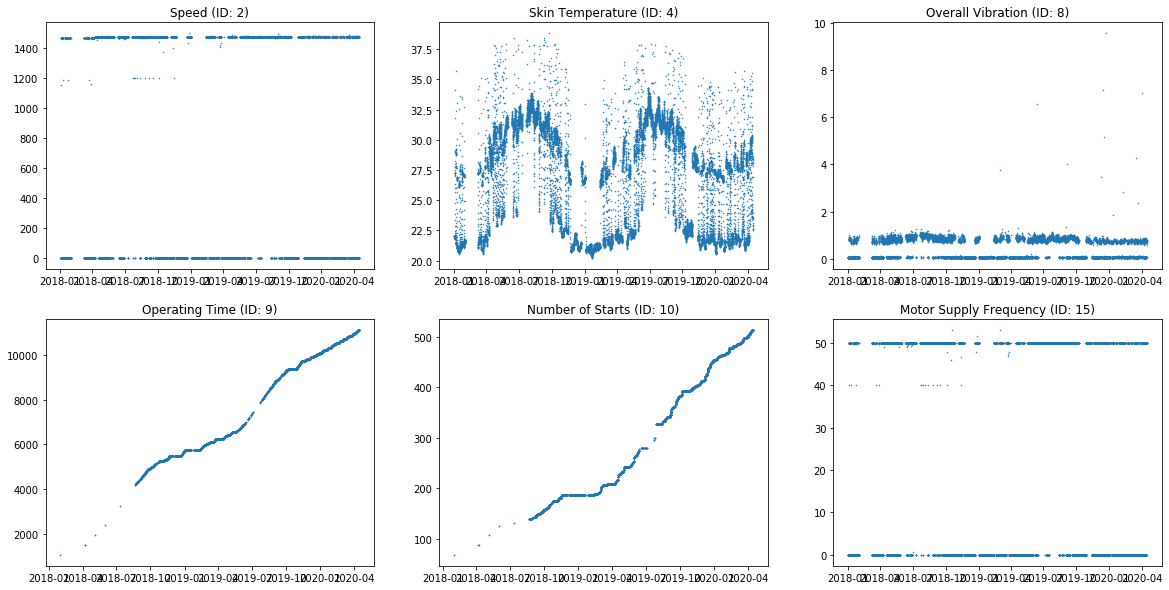

In [10]:
j=1
for i in range(2, 8):
    plt.subplot(2,3,j)
    plt.plot_date(x[i],y[i], fmt='o', ms=0.5)
    plt.title(data.columns[i])
    j+=1
plt.show()

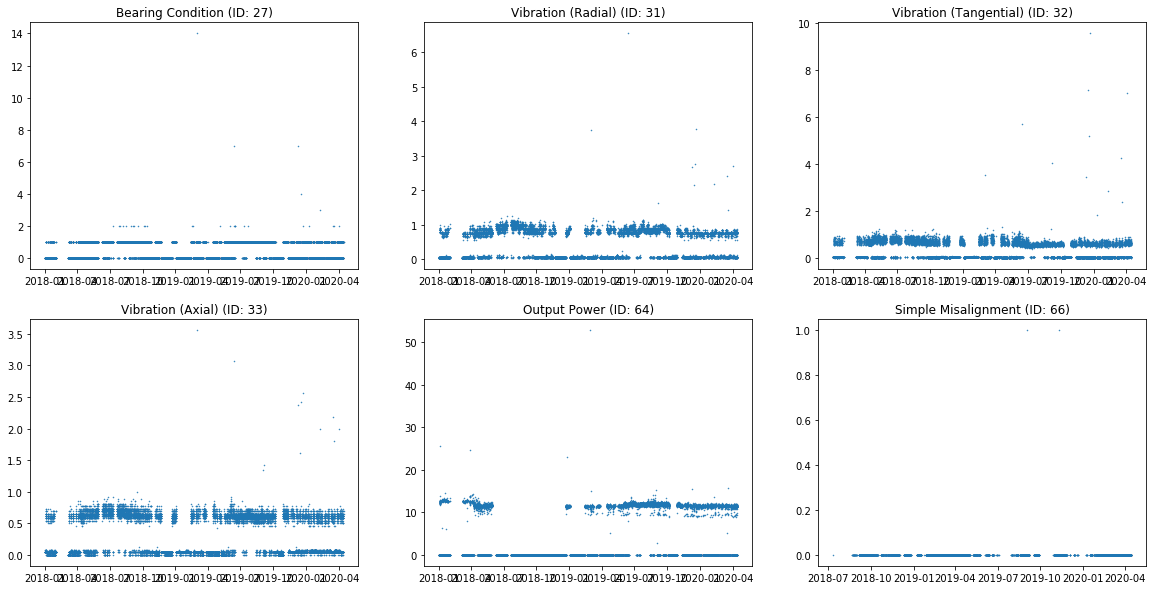

In [15]:
j=1
for i in range(8, 14):
    plt.subplot(2,3,j)
    plt.plot_date(x[i],y[i], fmt='o', ms=0.5)
    plt.title(data.columns[i])
    j+=1
plt.show()

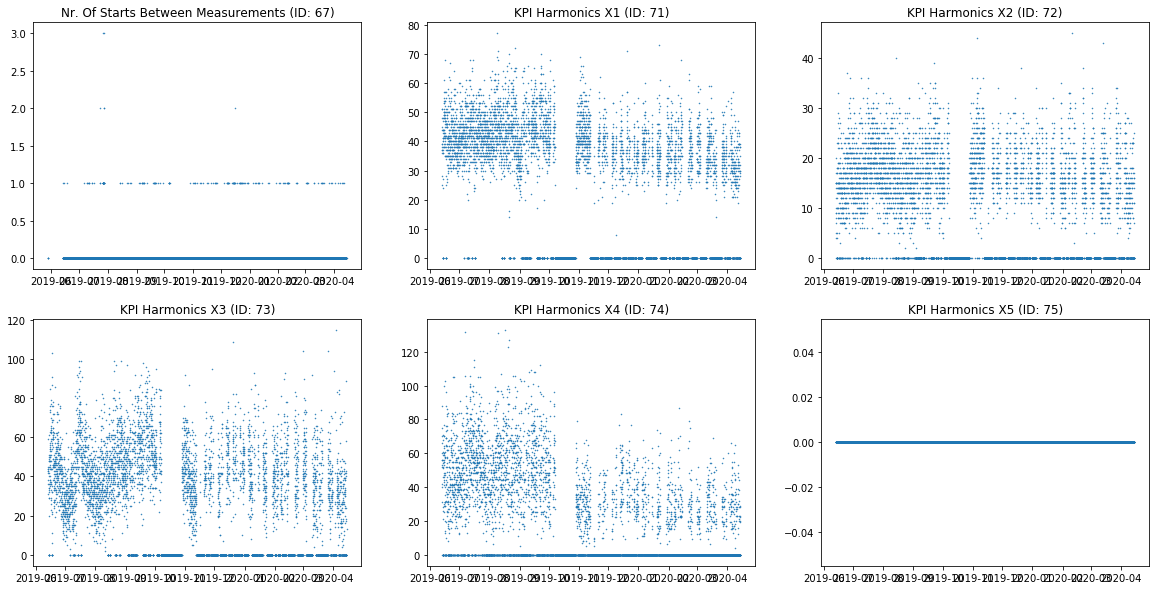

In [16]:
j=1
for i in range(14, 20):
    plt.subplot(2,3,j)
    plt.plot_date(x[i],y[i], fmt='o', ms=0.5)
    plt.title(data.columns[i])
    j+=1
plt.show()

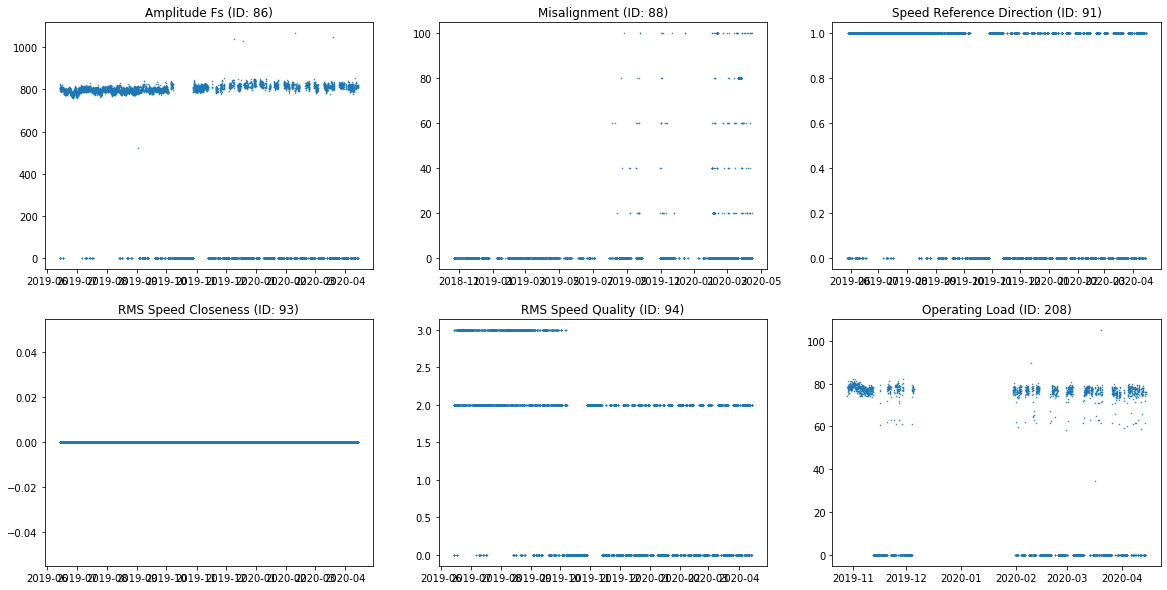

In [18]:
j=1
for i in range(30, 36):
    plt.subplot(2,3,j)
    plt.plot_date(x[i],y[i], fmt='o', ms=0.5)
    plt.title(data.columns[i])
    j+=1
plt.show()

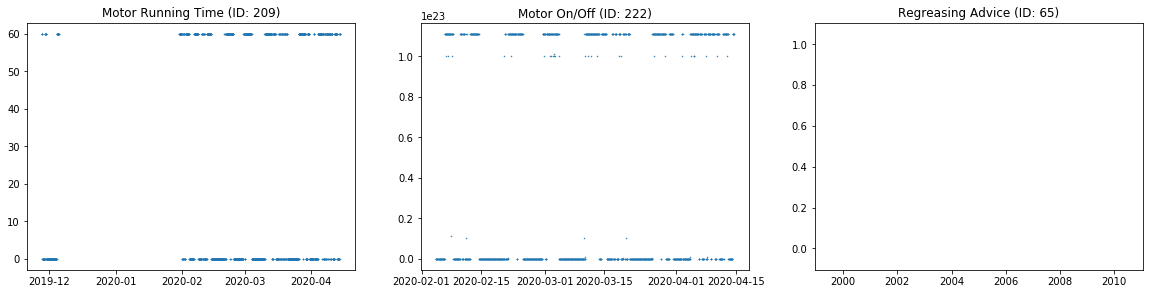

In [19]:
j=1
for i in range(36, 39):
    plt.subplot(2,3,j)
    plt.plot_date(x[i],y[i], fmt='o', ms=0.5)
    plt.title(data.columns[i])
    j+=1
plt.show()

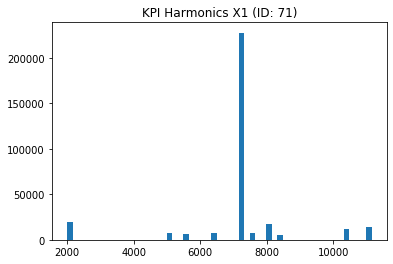

In [12]:
plt.hist(data.iloc[np.where(pd.notnull(data.iloc[:, 15]))].iloc[:,0], bins=55)
plt.title(data.columns[15])
plt.show()


In [11]:
data.iloc[np.where(pd.notnull(data.iloc[:, 15]))].iloc[:,[0,15]]

assetID KPI Harmonics X1 (ID: 71)
621       10460                         0
622       10460                         0
623       10460                         0
624       10460                         0
625       10460                         0
...         ...                       ...
1247010    8453                       255
1247011    8453                       255
1247012    8453                       166
1247013    8453                       255
1247014    8453                       255

[325765 rows x 2 columns]

In [7]:
np.unique(data.iloc[np.where(pd.notnull(data.iloc[:, 15]))].iloc[:,0])

array([1996.0, 1998.0, 5011.0, 5545.0, 6345.0, 7215.0, 7221.0, 7225.0,
       7226.0, 7230.0, 7231.0, 7232.0, 7233.0, 7235.0, 7237.0, 7239.0,
       7240.0, 7241.0, 7242.0, 7245.0, 7247.0, 7248.0, 7250.0, 7251.0,
       7252.0, 7254.0, 7256.0, 7257.0, 7258.0, 7259.0, 7260.0, 7262.0,
       7263.0, 7264.0, 7265.0, 7266.0, 7267.0, 7268.0, 7269.0, 7273.0,
       7274.0, 7275.0, 7276.0, 7278.0, 7555.0, 8004.0, 8005.0, 8008.0,
       8010.0, 8453.0, 10460.0, 11148.0, 11151.0], dtype=object)

In [14]:
data.iloc[np.where(pd.notnull(data.iloc[:, 15]))].iloc[:,[0, 2, 15, 16]]

assetID Speed (ID: 2) KPI Harmonics X1 (ID: 71)  \
621       10460             0                         0   
622       10460             0                         0   
623       10460             0                         0   
624       10460             0                         0   
625       10460             0                         0   
...         ...           ...                       ...   
1247010    8453           NaN                       255   
1247011    8453           NaN                       255   
1247012    8453           NaN                       166   
1247013    8453           NaN                       255   
1247014    8453           NaN                       255   

        KPI Harmonics X2 (ID: 72)  
621                             0  
622                             0  
623                             0  
624                             0  
625                             0  
...                           ...  
1247010                         0  
1247011                         0  
1247012                         0  
1247013                         0  
1247014                         0  

[325765 rows x 4 columns]

In [17]:
from collections import Counter
Counter(data.iloc[np.where(pd.notnull(data.iloc[:, 15]))].iloc[:,0]).keys()
Counter(data.iloc[np.where(pd.notnull(data.iloc[:, 15]))].iloc[:,0]).values()

dict_values([12184, 6034, 7938, 12575, 7435, 7345, 6873, 7382, 3837, 7180, 7398, 7077, 6659, 7065, 6966, 7420, 7445, 3873, 3899, 7385, 3895, 7137, 7384, 7476, 7430, 7422, 7456, 3873, 7144, 3875, 7378, 7496, 7429, 3237, 6455, 3931, 7745, 3470, 6896, 4297, 7079, 6898, 2058, 3875, 3844, 1958, 4325, 7383, 7361, 6906, 1973, 1378, 5331])